In [2]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [3]:
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2

features = torch.randn(num_examples,num_inputs,dtype=torch.float32)
labels = true_w[0] *features[:,0]+true_w[1]*features[:,1]+true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)

In [4]:
features[0]

tensor([-1.0085,  0.5254])

In [5]:
labels[0]

tensor(0.3947)

In [6]:
def use_svg_display():
    display.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
set_figsize()

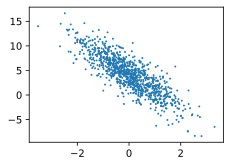

In [7]:
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

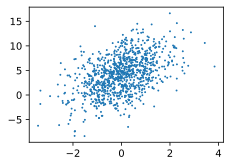

In [8]:
plt.scatter(features[:,0].numpy(),labels.numpy(),1)

In [9]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size,num_examples)]
    )
        yield features.index_select(0,j),labels.index_select(0,j)
    

In [10]:
batch_size = 10

for x, y in data_iter(batch_size,features=features,labels=labels):
    print(x,y)
    break

tensor([[-0.5412,  0.3122],
        [-1.1386, -0.8880],
        [ 0.0680, -0.1324],
        [-0.6686,  1.4034],
        [ 0.2377,  1.1645],
        [ 0.0792,  0.8000],
        [-1.2185,  0.4604],
        [ 0.7836,  0.6770],
        [ 0.0103,  0.6335],
        [-0.3943, -0.1637]]) tensor([ 2.0354,  4.9266,  4.7906, -1.9072,  0.7240,  1.6370,  0.1950,  3.4683,
         2.0532,  3.9791])


In [11]:
#初始化模型参数
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32)#列向量
b = torch.zeros(1,dtype=torch.float32)#b其实是个标量，这里用向量表示

In [12]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

In [13]:
def linreg(x,w,b):
    return torch.mm(x,w)+b


In [14]:
def squared_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2/2


In [15]:
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size#lr 学习率

In [16]:
lr=0.03
epochs=3
net = linreg
loss = squared_loss

for epoch in range(epochs):
    for x,y in data_iter(batch_size,features,labels):
        l = loss(net(x,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features,w,b),labels)#在所有的训练集上看loss
    #print('epoch {0:d} with loss: {1:f}'.format(epoch+1,train_l.mean().item()))
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.049395
epoch 2, loss 0.000211
epoch 3, loss 0.000050


In [17]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9998],
        [-3.3991]], requires_grad=True)
4.2 
 tensor([4.1989], requires_grad=True)


In [18]:
import torch.utils.data as Data
dataset = Data.TensorDataset(features,labels)

data_iter = Data.DataLoader(dataset,batch_size,shuffle=True)

In [21]:
import torch.nn as nn

In [23]:
class LinearNet(nn.Module):
    def __init__(self,n_feature):
        super(LinearNet,self).__init__()
        self.linear=nn.Linear(n_feature,1)
    #前向传播
    def forward(self,x):
        y = self.linear(x)
        return y

In [25]:
net = LinearNet(num_inputs)#2个特征

In [26]:
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [27]:
seq_net = nn.Sequential(nn.Linear(num_inputs,1))#Sequential 1

In [28]:
seq_net_2 = nn.Sequential()
seq_net_2.add_module('linear',nn.Linear(num_inputs,1))#Sequential 2

In [29]:
from collections import OrderedDict

seq_net_3 = nn.Sequential(OrderedDict([
    ('linear',nn.Linear(num_inputs,1))
]))

In [30]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.7028, -0.4109]], requires_grad=True)
Parameter containing:
tensor([-0.1695], requires_grad=True)


In [38]:
from torch.nn import init

init.normal_(net.linear.weight,mean=0,std=0.01)
init.constant_(net.linear.bias,val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [39]:
loss = nn.MSELoss()

In [40]:
import torch.optim as optim

In [41]:
optimizer = optim.SGD(net.parameters(),lr = 0.03)

In [42]:
print(optimizer
)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [43]:
epochs = 3

In [48]:
for epoch in range(epochs):
    for x,y in data_iter:
        out = net(x)
        l = loss(out,y.view(-1,1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f ;' % (epoch+1,l.item()))

epoch 1, loss: 0.000080 ;
epoch 2, loss: 0.000088 ;
epoch 3, loss: 0.000086 ;


In [49]:
dense = net.linear
print(true_w,dense.weight)
print(true_b,dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 2.0004, -3.4005]], requires_grad=True)
4.2 Parameter containing:
tensor([4.2001], requires_grad=True)
